In [130]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


<div style="background-color: #008080; padding: 25px; border-radius: 10px;font-size:20px;font-weight:10px">
  <h1 style="color: #333;"><strong>Netflix Data Analysis</strong></h1>
</div>

<img src="https://goldstreetbusiness.com/wp-content/uploads/2022/04/Netflix.jpg" width=1200>

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

In [132]:
netflix_df = pd.read_csv(r"C:\Users\Reshma\OneDrive\Desktop\Data Analytics\Python\Netflix Project\netflix_titles.csv")
netflix_df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [133]:
netflix_df.shape

(8807, 12)

<div style="background-color: #008080; padding: 20px; border-radius: 10px;font-size:15px;font-weight:5px">
  <h1 style="color: #333;"><strong>How many columns are present in the dataset</strong></h1>
</div>

In [135]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [136]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [137]:
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


<div style="background-color: #008080; padding: 20px; border-radius: 10px;font-size:15px;font-weight:5px">
  <h1 style="color: #333;"><strong>checking if there any null value present in the dataset</style></h1>
</div>

In [139]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<div style="background-color: #008080; padding: 20px; border-radius: 10px;font-size:15px;font-weight:5px">
  <h1 style="color: #333;"><strong>checking if there any duplicate value present in the dataset or not</style></h1>
</div>

In [141]:
netflix_df.duplicated().sum()

0

<div style="background-color: #008080; padding: 20px; border-radius: 10px;font-size:15px;font-weight:5px">
  <h1 style="color: #333;"><strong>checking unique values for features / count number of unique values</style></h1>
</div>

In [143]:
netflix_df["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [144]:
netflix_df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [145]:
netflix_df["release_year"].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

In [146]:
netflix_df["listed_in"].nunique()

514

In [147]:
netflix_df["type"].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

<div style="background-color: #03a9ec; padding: 20px; border-radius: 10px;font-size:15px;font-weight:5px">
  <h1 style="color: #333;"><strong>checking the no of movies vs no of shows in the netflix library</style></h1>
</div>

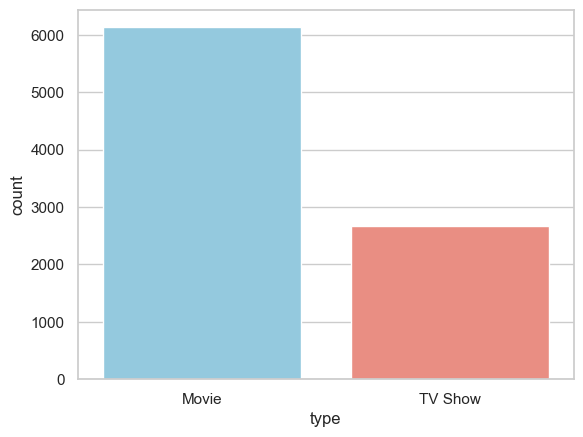

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
sns.countplot(data=netflix_df, x="type", palette={'Movie': 'skyblue', 'TV Show': 'salmon'})
plt.show()

<Axes: ylabel='count'>

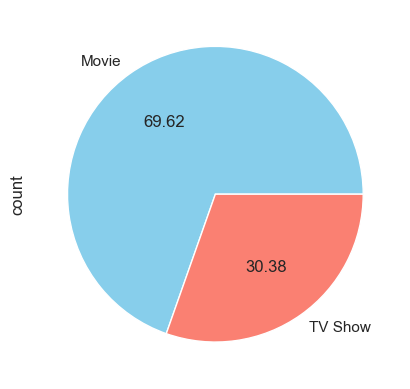

In [150]:
netflix_df["type"].value_counts().plot(kind="pie", autopct="%.2f", colors=["skyblue", "salmon"])

<div style="background-color: #008080; padding: 20px; border-radius: 10px;font-size:15px;font-weight:5px">
  <h1 style="color: #333;"><strong>checking no of ratings in each category for movies and TV shows</style></h1>
</div>

In [152]:
print(netflix_df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


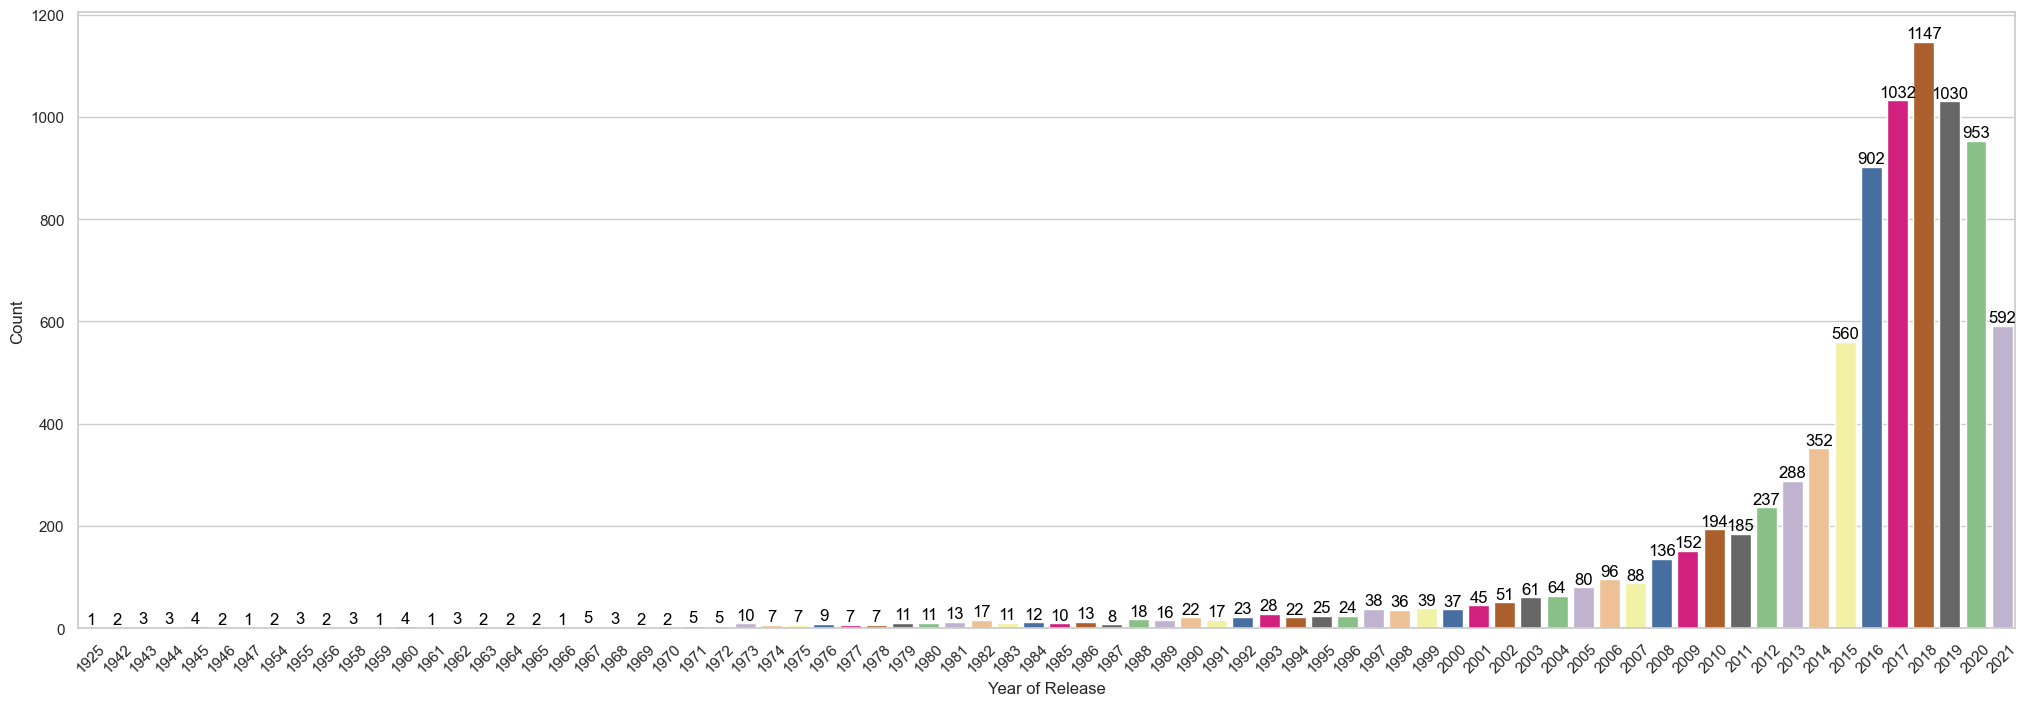

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

plt.figure(figsize=(25, 8))
chart = sns.countplot(x='release_year', data=netflix_df, palette="Accent")
plt.xlabel('Year of Release')
plt.ylabel('Count')
plt.xticks(rotation=45)

for bar in chart.patches:
    height = bar.get_height()
    x_pos = bar.get_x() + bar.get_width() / 2
    chart.annotate(f'{int(height)}',
                   (x_pos, height + 1),
                   ha='center', va='bottom', color='black')

plt.show()

* <b> Changing "date_added" column type from object to datetime64[ns]

In [155]:
netflix_df[netflix_df["date_added"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [156]:
netflix_df["date_added"] = netflix_df["date_added"].astype(str).str.strip()
netflix_df["date_added"] = pd.to_datetime(netflix_df["date_added"], errors='coerce')


In [157]:
netflix_df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [158]:
netflix_df.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5933,s5934,TV Show,The Borgias,NaN,"Jeremy Irons, François Arnaud, Holliday Graing...","United States, Hungary, Ireland, Canada",2014-02-01,2013,TV-MA,3 Seasons,TV Dramas,Follow the lives of the notorious Borgia famil...


<div style="background-color: #008080; padding:18px; border-radius: 10px;font-size:15px;font-weight:5px">
  <h1 style="color: #333;"><strong>Ploting Histogram of how many Movies/TV Shows addde in Netflix each year</style></h1>
</div>

<Axes: >

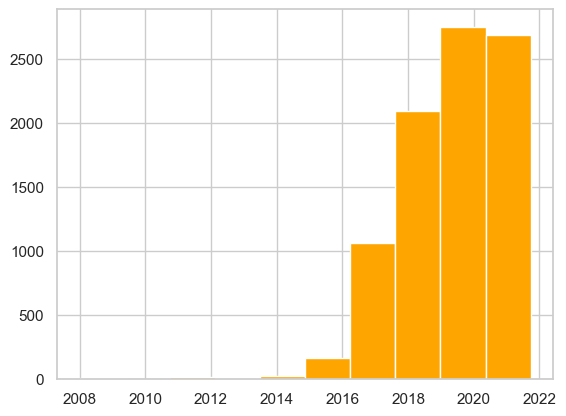

In [160]:
netflix_df["date_added"].hist(color='orange')


<div style="background-color: #008080; padding:18px; border-radius: 10px;font-size:15px;font-weight:5px">
  <h1 style="color: #333;"><strong>How many TV Shows Released in the year -1995?</style></h1>
</div>

In [162]:
netflix_df[(netflix_df["type"] == "TV Show") & (netflix_df["release_year"] == 1995)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3724,s3725,TV Show,Neon Genesis Evangelion,NaN,"Megumi Ogata, Kotono Mitsuishi, Yuriko Yamaguc...",Japan,2019-06-21,1995,TV-MA,1 Season,"Anime Series, International TV Shows","Fifteen years after the Second Impact, Shinji ..."
8669,s8670,TV Show,V.R. Troopers,NaN,"Michael Sorich, Gardner Baldwin, Mike Reynolds...",United States,2016-01-01,1995,TV-G,2 Seasons,Kids' TV,Three friends who study martial arts find them...


<div style="background-color: #008080; padding:18px; border-radius: 10px;font-size:15px;font-weight:5px">
  <h1 style="color: #333;"><strong>Ploting Histogram of how many Movies/TV Shows released each year</style></h1>
</div>

<Axes: >

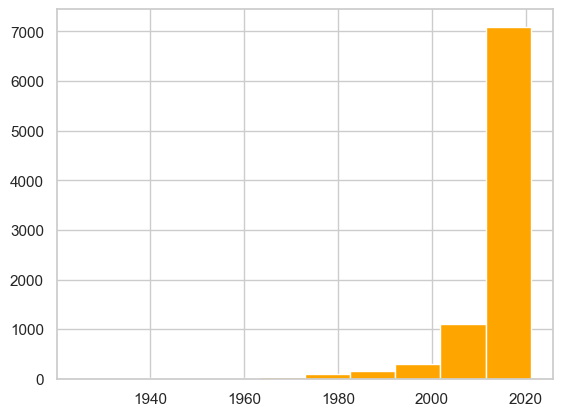

In [164]:
netflix_df["release_year"].hist(color='orange')

<div style="background-color: #008080; padding:18px; border-radius: 10px;font-size:15px;font-weight:5px">
  <h1 style="color: #333;"><strong>Checking if David Attenborough :A life On Our Planet is present in Netflix of Not?</style></h1>
</div>

In [166]:
netflix_df[netflix_df["title"].isin(["David Attenborough: A Life on Our Planet"])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1886,s1887,Movie,David Attenborough: A Life on Our Planet,"Alastair Fothergill, Jonnie Hughes, Keith Scholey",David Attenborough,"United States, United Kingdom",2020-10-04,2020,PG,84 min,Documentaries,"A broadcaster recounts his life, and the evolu..."


<div style="background-color: #008080; padding:18px; border-radius: 10px;font-size:15px;font-weight:5px">
  <h1 style="color: #333;"><strong>Ploting Histogram of how many Movies/TV Shows released each year - Plotly</style></h1>
</div>

In [168]:
px.histogram(netflix_df, x = "release_year", color = "release_year")

<div style="background-color: #008080; padding:18px; border-radius: 10px;font-size:15px;font-weight:5px">
  <h1 style="color: #333;"><strong>Ploting Histogram of how many Movies/TV Shows released each year - Matplotlib</style></h1>
</div>

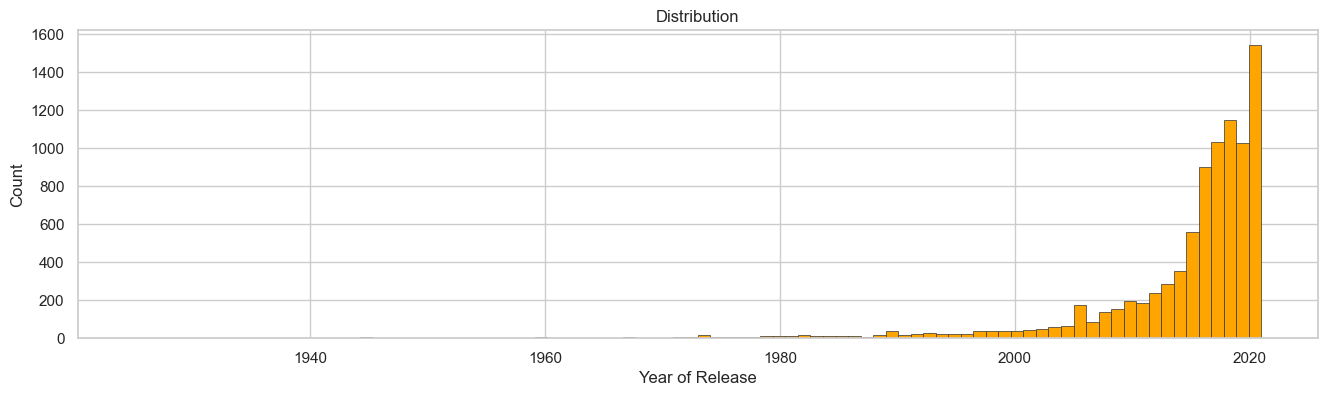

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")  # Correct way to apply seaborn whitegrid style

plt.figure(figsize=(16, 4))
plt.hist(netflix_df["release_year"], bins=90, 
         facecolor='#FFA500', edgecolor='#323232', linewidth=0.5)

plt.title('Distribution')
plt.xlabel('Year of Release')
plt.ylabel('Count')
plt.show()

<div style="background-color: #008080; padding:18px; border-radius: 10px;font-size:15px;font-weight:5px">
  <h1 style="color: #333;"><strong>What is the number of movies made only in japan?</style></h1>
</div>

In [172]:
movies_only_in_japan = netflix_df[(netflix_df["type"] == "Movie") & (netflix_df["country"] == "Japan")]["title"]

In [173]:
movies_only_in_japan.count()

76

In [174]:
movies_only_in_japan.unique()

array(['InuYasha the Movie 2: The Castle Beyond the Looking Glass',
       'InuYasha the Movie 3: Swords of an Honorable Ruler',
       'InuYasha the Movie 4: Fire on the Mystic Island',
       'InuYasha the Movie: Affections Touching Across Time',
       'Naruto Shippuden the Movie: Blood Prison',
       'Naruto Shippûden the Movie: Bonds',
       'Naruto Shippûden the Movie: The Will of Fire',
       'Naruto Shippuden: The Movie',
       'Naruto Shippuden: The Movie: The Lost Tower',
       'Naruto the Movie 2: Legend of the Stone of Gelel',
       'Naruto the Movie 3: Guardians of the Crescent Moon Kingdom',
       'Naruto the Movie: Ninja Clash in the Land of Snow', 'HOMUNCULUS',
       'GANTZ:O', 'Ride or Die',
       'Seven Souls in the Skull Castle: Season Flower',
       'Any Crybabies Around?', 'Blue, Painful, Fragile', 'MOTHER',
       'DTC Yukemuri Junjo Hen From High & Low', 'High & Low The Movie',
       'High & Low The Movie 2 / End of Sky',
       'High & Low The Movie 3

### Working with Date

In [176]:
netflix_df["date_added"].dt.month

0        9.0
1        9.0
2        9.0
3        9.0
4        9.0
        ... 
8802    11.0
8803     7.0
8804    11.0
8805     1.0
8806     3.0
Name: date_added, Length: 8807, dtype: float64

In [177]:
netflix_df["date_added_month"] = netflix_df["date_added"].dt.month.fillna(-1)
netflix_df["date_added_month"].unique()

array([ 9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1., 12., 11., 10., -1.])

In [178]:
netflix_df["date_added_month"] = netflix_df["date_added_month"].astype("Int64")
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8807 non-null   object        
 1   type              8807 non-null   object        
 2   title             8807 non-null   object        
 3   director          6173 non-null   object        
 4   cast              7982 non-null   object        
 5   country           7976 non-null   object        
 6   date_added        8797 non-null   datetime64[ns]
 7   release_year      8807 non-null   int64         
 8   rating            8803 non-null   object        
 9   duration          8804 non-null   object        
 10  listed_in         8807 non-null   object        
 11  description       8807 non-null   object        
 12  date_added_month  8807 non-null   Int64         
dtypes: Int64(1), datetime64[ns](1), int64(1), object(10)
memory usage: 903.2+ KB


<div style="background-color: #008080; padding:18px; border-radius: 10px;font-size:15px;font-weight:5px">
  <h1 style="color: #333;"><strong>Checking the number of content added Month-wise</style></h1>
</div>

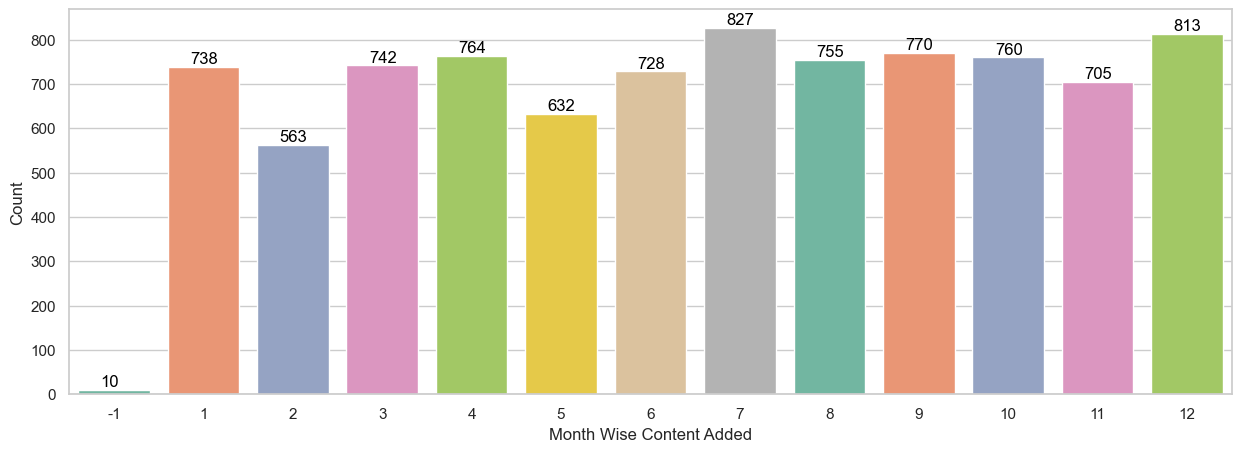

In [180]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(x='date_added_month', data=netflix_df, palette='Set2')  # Example palette
plt.xlabel('Month Wise Content Added')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), 
                va='bottom', color='black')


In [181]:
netflix_df["date_added_day"] = netflix_df["date_added"].dt.day.fillna(-1)
netflix_df["date_added_day"].unique()

array([25., 24., 23., 22., 21., 20., 19., 17., 16., 15., 14., 11., 10.,
        9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1., 31., 29., 28., 27.,
       26., 18., 13., 12., 30., -1.])

In [182]:
netflix_df["date_added_day"] = netflix_df["date_added_day"].astype("Int64")
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8807 non-null   object        
 1   type              8807 non-null   object        
 2   title             8807 non-null   object        
 3   director          6173 non-null   object        
 4   cast              7982 non-null   object        
 5   country           7976 non-null   object        
 6   date_added        8797 non-null   datetime64[ns]
 7   release_year      8807 non-null   int64         
 8   rating            8803 non-null   object        
 9   duration          8804 non-null   object        
 10  listed_in         8807 non-null   object        
 11  description       8807 non-null   object        
 12  date_added_month  8807 non-null   Int64         
 13  date_added_day    8807 non-null   Int64         
dtypes: Int64(2), datetime64[

<div style="background-color: #008080; padding:18px; border-radius: 10px;font-size:15px;font-weight:5px">
  <h1 style="color: #333;"><strong>Checking the number of content added Day-wise</style></h1>
</div>

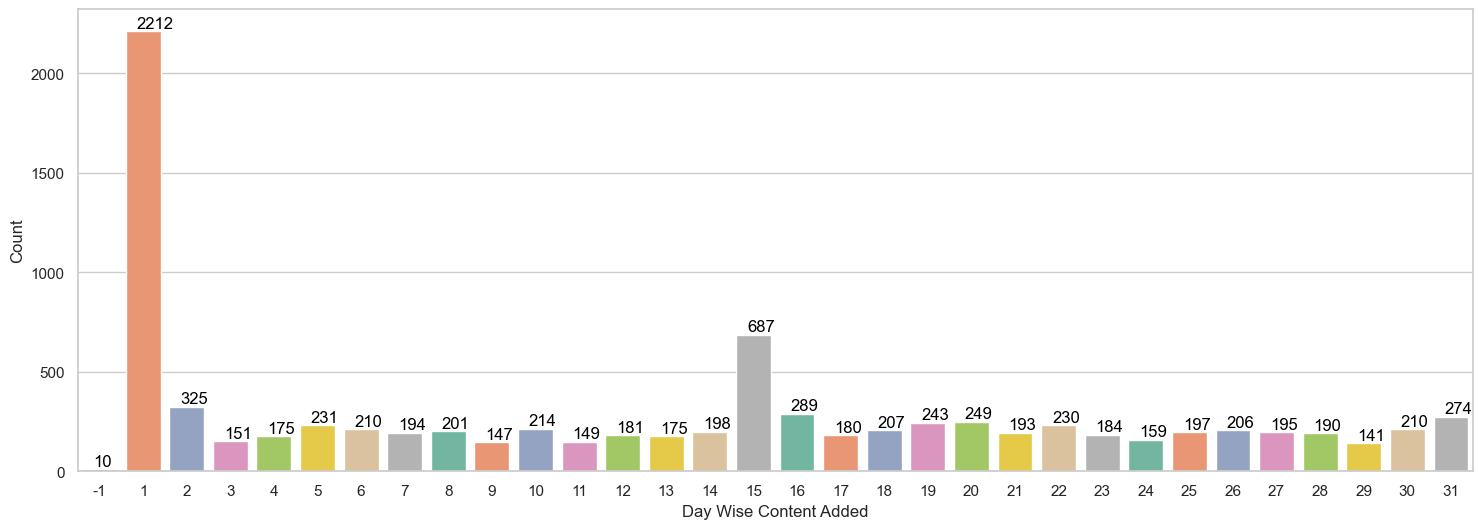

In [184]:
plt.figure(figsize = (18, 6))
ax = sns.countplot(x = 'date_added_day', data = netflix_df, palette='Set2')
plt.xlabel('Day Wise Content Added')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

<div style="background-color: #008080; padding:18px; border-radius: 10px;font-size:15px;font-weight:5px">
  <h1 style="color: #333;"><strong>Scatter Plot for content released per year vs Month-wise content added - Plotly </style></h1>
</div>

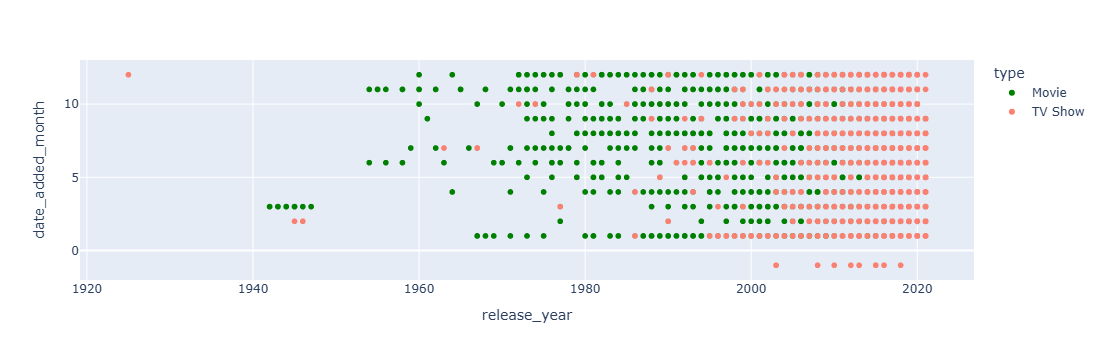

In [186]:
df = px.data.tips()
fig = px.scatter(netflix_df, x = "release_year", y = "date_added_month", color = "type", color_discrete_sequence = ["green", "salmon"])
fig.show()

In [187]:
netflix_df.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_day
4131,s4132,TV Show,Violet Evergarden,NaN,"Yui Ishikawa, Takehito Koyasu, Daisuke Namikaw...",Japan,2019-02-05,2018,TV-14,1 Season,"Anime Series, International TV Shows, Romantic...","The war is over, and Violet Evergarden needs a...",2,5


### Working with Country

In [189]:
country_count = netflix_df.copy()
country_count = pd.concat([country_count, netflix_df["country"].str.split(",", expand = True)], axis = 1)
country_count

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,2,3,4,5,6,7,8,9,10,11
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,...,None,None,None,None,None,None,None,None,None,None
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,...,None,None,None,None,None,None,None,None,None,None
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,...,None,None,None,None,None,None,None,None,None,None
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,...,None,None,None,None,None,None,None,None,None,None


In [198]:
country_count["country"].nunique()

748

In [200]:
country_count["country"].value_counts()[:10]

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

<div style="background-color: #008080; padding:18px; border-radius: 10px;font-size:15px;font-weight:5px">
  <h1 style="color: #333;"><strong>Top 30 Countries where most of the Movies/TV shows are produced</style></h1>
</div>

Text(0.5, 0, 'Count')

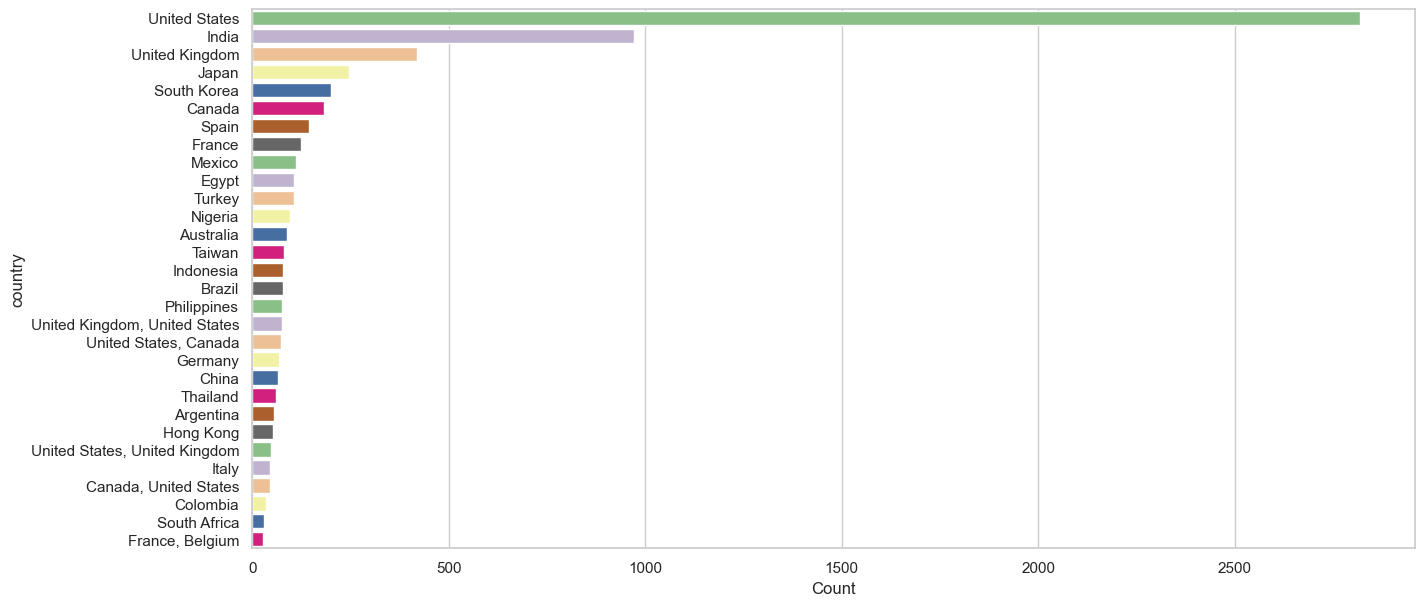

In [204]:
plt.figure(figsize = (15, 7))
country = country_count["country"].value_counts()[:30]
sns.barplot(x = country, y = country.index, palette = "Accent")
plt.xlabel("Count")

### There are 2 different United States entry in the Dataset, so we will Merge the Duplicate value with Original to Make a single entry

In [209]:
country_count["country"] = country_count["country"].str.strip()

In [211]:
country_count["country"].value_counts()[:10]

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

<div style="background-color: #008080; padding:18px; border-radius: 10px;font-size:15px;font-weight:5px">
  <h1 style="color: #333;"><strong>Top 30 Countries where most of the Movies/TV shows are produced - Cleaned</style></h1>
</div>

<Axes: xlabel='count', ylabel='country'>

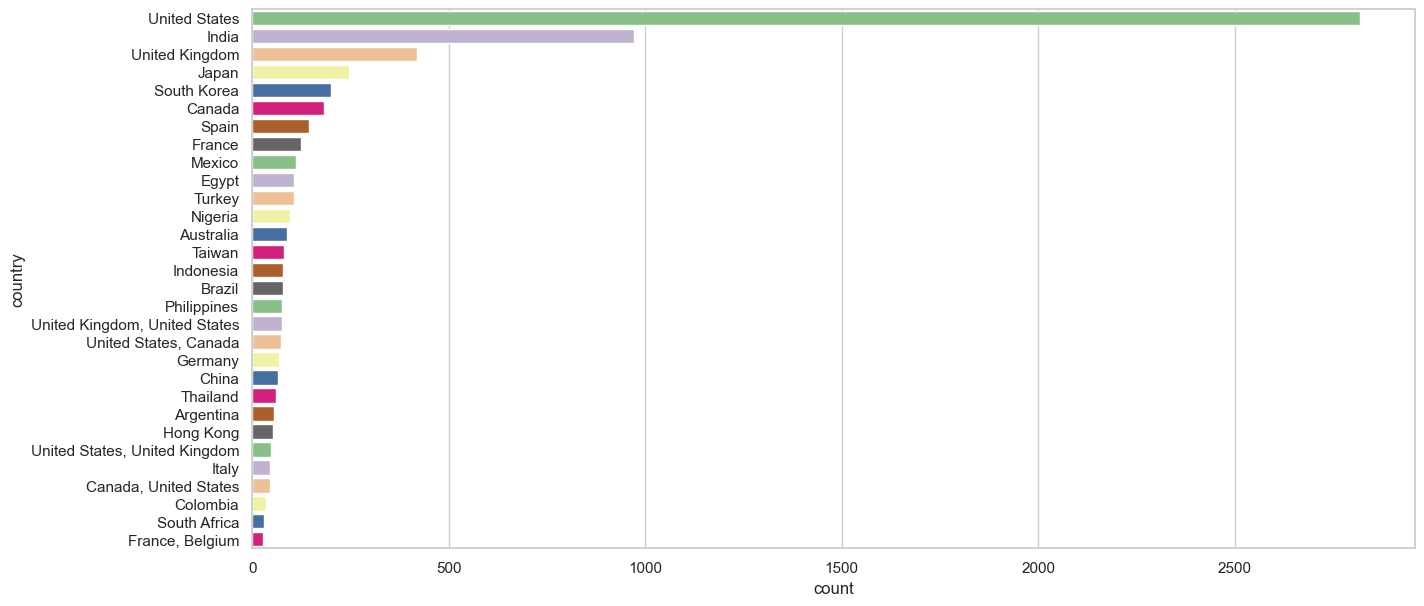

In [215]:
plt.figure(figsize = (15, 7))
country = country_count["country"].value_counts()[:30]
sns.barplot(x = country, y = country.index, palette = "Accent")

<div style="background-color: #008080; padding:18px; border-radius: 10px;font-size:15px;font-weight:5px">
  <h1 style="color: #333;"><strong>Top 30 Countries where most of the Movies/TV shows are produced - Plotly</style></h1>
</div>

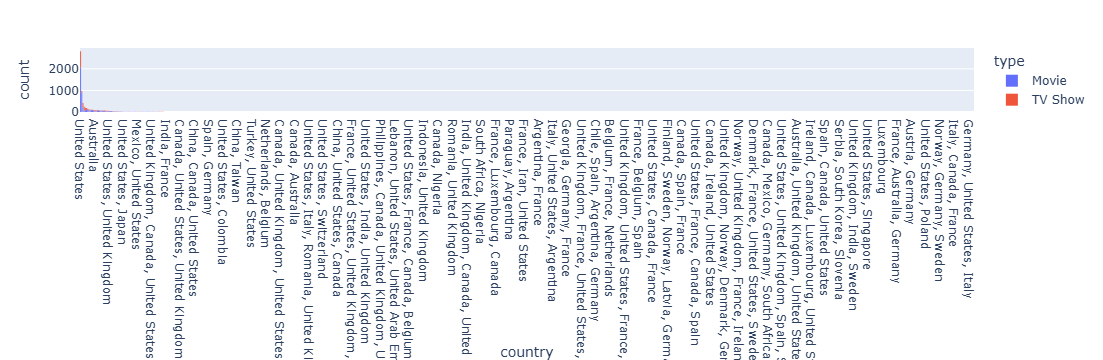

In [219]:
px.histogram(country_count, "country", color = "type").update_xaxes(categoryorder = "total descending")

In [221]:
netflix_df.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_day
8155,s8156,Movie,Teach Us All,Sonia Lowman,NaN,United States,2017-09-25,2017,TV-14,81 min,Documentaries,It's been decades since Brown v. Board of Educ...,9,25


<div style="background-color: #008080; padding:18px; border-radius: 10px;font-size:15px;font-weight:5px">
  <h1 style="color: #333;"><strong>Plotting HeatMap between Content Rating vs Content type</style></h1>
</div>

<Axes: xlabel='type', ylabel='rating'>

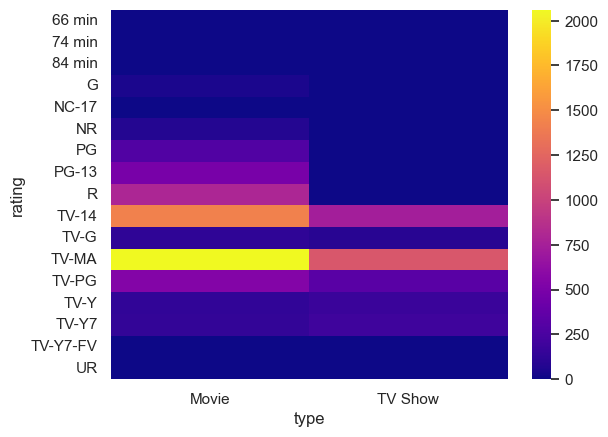

In [225]:
colormap = plt.cm.plasma
sns.heatmap(pd.crosstab(netflix_df["rating"], netflix_df["type"]), cmap = colormap)

### Working with Cast

In [234]:
cast_count = netflix_df.copy()
cast_count = pd.concat([cast_count, netflix_df["cast"].str.split(",", expand = True)], axis = 1)
cast_count

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,40,41,42,43,44,45,46,47,48,49
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,...,None,None,None,None,None,None,None,None,None,None
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,...,None,None,None,None,None,None,None,None,None,None
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,...,None,None,None,None,None,None,None,None,None,None
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,...,None,None,None,None,None,None,None,None,None,None


In [240]:
cast_count = cast_count.melt(id_vars=["type", "title"], value_vars=range(50), value_name="cast_name").dropna(subset=["cast_name"])

In [242]:
cast_count

,type,title,variable,cast_name
1,TV Show,Blood & Water,0,Ama Qamata
2,TV Show,Ganglands,0,Sami Bouajila
4,TV Show,Kota Factory,0,Mayur More
5,TV Show,Midnight Mass,0,Kate Siegel
6,Movie,My Little Pony: A New Generation,0,Vanessa Hudgens
...,...,...,...,...
417703,TV Show,Black Mirror,47,Jon Hamm
424590,TV Show,Social Distance,48,Ayize Ma'at
426510,TV Show,Black Mirror,48,Oona Chaplin
433397,TV Show,Social Distance,49,Lovie Simone


In [246]:
cast_count["cast_name"].nunique()

39296

<div style="background-color: #008080; padding:18px; border-radius: 10px;font-size:15px;font-weight:5px">
  <h1 style="color: #333;"><strong>Top 20 Actors who involved in most number of Movies/TV Shows</style></h1>
</div>

<Axes: xlabel='count', ylabel='cast_name'>

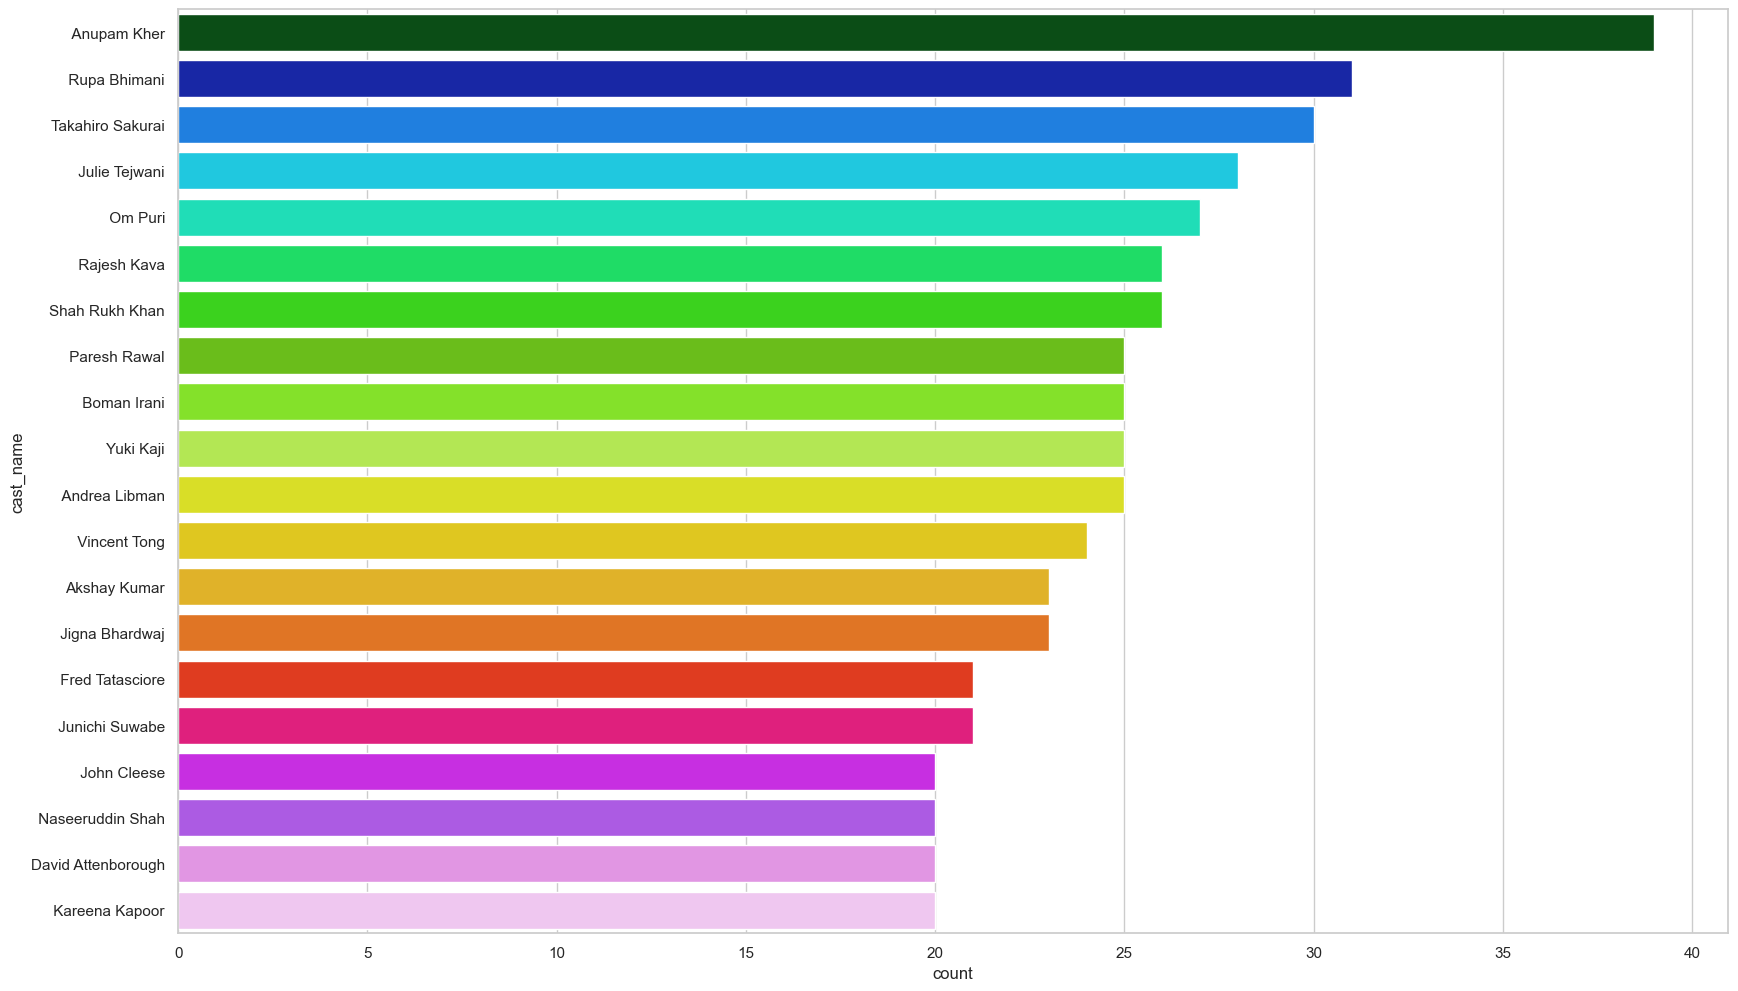

In [252]:
plt.figure(figsize = (20, 12))
cast = cast_count["cast_name"].value_counts()[:20]
sns.barplot(x = cast, y = cast.index, palette = "gist_ncar")

<div style="background-color: #008080; padding:18px; border-radius: 10px;font-size:15px;font-weight:5px">
  <h1 style="color: #333;"><strong>How many Movies present in Netflix where Bill Murray Acted?</style></h1>
</div>

In [259]:
updated_df = netflix_df.dropna()

In [263]:
updated_df[updated_df["cast"].str.contains("Bill Murray")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_day
494,s495,Movie,Rock the Kasbah,Barry Levinson,"Bill Murray, Kate Hudson, Zooey Deschanel, Dan...",United States,2021-07-08,2015,R,106 min,"Comedies, Music & Musicals",When a has-been music producer gets stuck in A...,7,8
566,s567,Movie,Charlie's Angels,McG,"Cameron Diaz, Drew Barrymore, Lucy Liu, Bill M...","United States, Germany",2021-07-01,2000,PG-13,98 min,"Action & Adventure, Comedies",A tight-knit trio of specially trained agents ...,7,1
5881,s5882,Movie,A Very Murray Christmas,Sofia Coppola,"Bill Murray, Miley Cyrus, George Clooney, Chri...",United States,2015-12-04,2015,TV-14,57 min,"Comedies, Music & Musicals",Bill Murray rounds up an all-star cast for an ...,12,4
6036,s6037,Movie,A Glimpse Inside the Mind of Charles Swan III,Roman Coppola,"Charlie Sheen, Jason Schwartzman, Bill Murray,...",United States,2018-07-15,2012,R,86 min,"Comedies, Independent Movies",When his girlfriend walks out and leaves him a...,7,15
6842,s6843,Movie,Get Smart,Peter Segal,"Steve Carell, Anne Hathaway, Dwayne Johnson, A...",United States,2019-04-01,2008,PG-13,110 min,"Action & Adventure, Comedies",When the identities of secret agents are compr...,4,1
7210,s7211,Movie,Kingpin,"Peter Farrelly, Bobby Farrelly","Woody Harrelson, Randy Quaid, Vanessa Angel, B...",United States,2020-01-01,1996,PG-13,114 min,"Comedies, Cult Movies, Sports Movies","After a bowler loses his hand, his career take...",1,1
8105,s8106,Movie,Stripes,Ivan Reitman,"Bill Murray, Harold Ramis, Warren Oates, P.J. ...",United States,2019-09-01,1981,R,106 min,"Classic Movies, Comedies, Cult Movies","After losing everything, an indolent sad sack ...",9,1
8210,s8211,Movie,The Bill Murray Stories: Life Lessons Learned ...,Tommy Avallone,"Tommy Avallone, Bill Murray, Joel Murray, Pete...",United States,2018-12-31,2018,TV-MA,72 min,Documentaries,This documentary highlights spontaneous encoun...,12,31
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11,1


### Working with Listed in

In [266]:
listed_in_count = netflix_df.copy()
listed_in_count = pd.concat([listed_in_count, netflix_df["listed_in"].str.split(",", expand = True)], axis = 1)
listed_in_count

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_month,date_added_day,0,1,2
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,25,Documentaries,None,None
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,24,International TV Shows,TV Dramas,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,24,Crime TV Shows,International TV Shows,TV Action & Adventure
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,24,Docuseries,Reality TV,None
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,24,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11,20,Cult Movies,Dramas,Thrillers
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",7,1,Kids' TV,Korean TV Shows,TV Comedies
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11,1,Comedies,Horror Movies,None
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1,11,Children & Family Movies,Comedies,None


In [272]:
listed_in_count = listed_in_count.melt(id_vars=["type", "title"], value_vars=range(3), value_name="listed_category").dropna(subset=["listed_category"])

In [274]:
listed_in_count

,type,title,variable,listed_category
0,Movie,Dick Johnson Is Dead,0,Documentaries
1,TV Show,Blood & Water,0,International TV Shows
2,TV Show,Ganglands,0,Crime TV Shows
3,TV Show,Jailbirds New Orleans,0,Docuseries
4,TV Show,Kota Factory,0,International TV Shows
...,...,...,...,...
26414,TV Show,Zindagi Gulzar Hai,2,TV Dramas
26415,Movie,Zinzana,2,Thrillers
26416,Movie,Zodiac,2,Thrillers
26417,TV Show,Zombie Dumb,2,TV Comedies


In [284]:
listed_in_count["listed_category"].unique()

array(['Documentaries', 'International TV Shows', 'Crime TV Shows',
       'Docuseries', 'TV Dramas', 'Children & Family Movies', 'Dramas',
       'British TV Shows', 'Comedies', 'TV Comedies', 'Thrillers',
       'Horror Movies', "Kids' TV", 'Action & Adventure', 'Reality TV',
       'Anime Series', 'International Movies', 'Sci-Fi & Fantasy',
       'Classic Movies', 'TV Shows', 'Stand-Up Comedy',
       'TV Action & Adventure', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV', 'Anime Features', 'Romantic TV Shows',
       'Cult Movies', 'Independent Movies', 'TV Horror',
       'Spanish-Language TV Shows', 'Music & Musicals', 'Romantic Movies',
       'LGBTQ Movies', 'TV Sci-Fi & Fantasy', 'Sports Movies',
       ' TV Dramas', ' International TV Shows', ' Reality TV',
       ' Romantic TV Shows', ' TV Horror', ' Independent Movies',
       ' Dramas', ' Docuseries', ' International Movies', ' Comedies',
       ' Crime TV Shows', ' Spanish-Language TV Shows',
      

In [286]:
netflix_df["rating"].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

### Working with Director

In [289]:
director_count = netflix_df.copy()
director_count = pd.concat([director_count, netflix_df["director"].str.split(",", expand = True)], axis = 1)
director_count

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,3,4,5,6,7,8,9,10,11,12
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,...,None,None,None,None,None,None,None,None,None,None
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,...,None,None,None,None,None,None,None,None,None,None
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,...,None,None,None,None,None,None,None,None,None,None
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,...,None,None,None,None,None,None,None,None,None,None
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,...,None,None,None,None,None,None,None,None,None,None


In [293]:
director_count = director_count.melt(id_vars=["type", "title"], value_vars=range(13), value_name="director_name").dropna(subset=["director_name"])
director_count

,type,title,variable,director_name
0,Movie,Dick Johnson Is Dead,0,Kirsten Johnson
2,TV Show,Ganglands,0,Julien Leclercq
5,TV Show,Midnight Mass,0,Mike Flanagan
6,Movie,My Little Pony: A New Generation,0,Robert Cullen
7,Movie,Sankofa,0,Haile Gerima
...,...,...,...,...
95585,Movie,Movie 43,10,Rusty Cundieff
102764,Movie,Walt Disney Animation Studios Short Films Coll...,11,Mike Gabriel
103787,Movie,HALO Legends,11,Hiroshi Yamazaki
104392,Movie,Movie 43,11,James Gunn


In [299]:
director_count["director_name"].nunique()

5120

In [303]:
director_count["director_name"].value_counts()

director_name
Rajiv Chilaka         22
 Jan Suter            18
Raúl Campos           18
Suhas Kadav           16
Marcus Raboy          16
                      ..
Peter Howitt           1
Chiwetel Ejiofor       1
Rodrigo Salomón        1
Miguel Ángel Vivas     1
 Mark Henn             1
Name: count, Length: 5120, dtype: int64

<div style="background-color: #008080; padding:18px; border-radius: 10px;font-size:15px;font-weight:5px">
  <h1 style="color: #333;"><strong>Top 20 Director who involved in most number of Movies/TV Shows</style></h1>
</div>

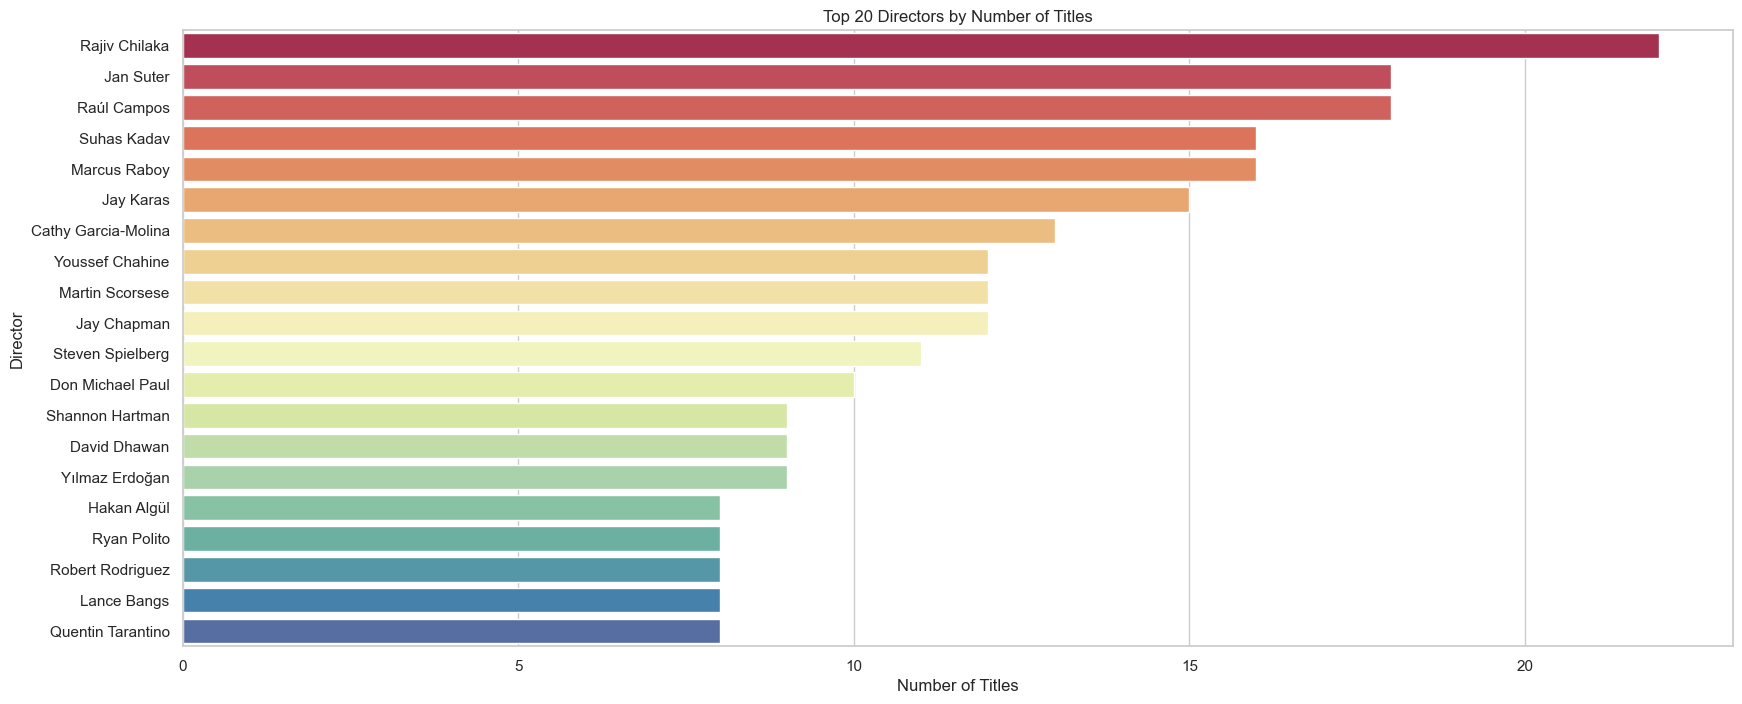

In [319]:
plt.figure(figsize=(20, 8))
top_directors = director_count["director_name"].value_counts().head(20)
sns.barplot(x=top_directors, y=top_directors.index, palette="Spectral")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.title("Top 20 Directors by Number of Titles")
plt.show()


<div style="background-color: #008080; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Final Insights</strong></h1>
</div>

1. The number of Netflix subscribers kept increasing since its launch, and subscription prices remained low, attracting early adopters and building strong initial traction.
2. As Netflix became widely known and adopted globally, its subscriber base continued growing rapidly, and prices also began increasing to support original content production and global expansion.
3. Around 2017–2018, increasing competition from emerging streaming platforms and content licensing challenges led to some uncertainty in the business model. Subscriber growth slowed slightly, while prices 
   continued rising to offset content and operational costs.
4. Once the competitive landscape stabilized and Netflix adapted its strategy with more focus on international markets and original productions, by 2020 subscriber numbers surged again, especially due to the 
   pandemic, while pricing remained relatively stable to retain market share.

<div style="background-color: #008080; padding: 25px; border-radius: 10px;">
  <h1 style="color: #333;"><strong>Recommendation for Netflix Data Analysis</strong></h1>
</div>


1. Regulations around content distribution, censorship, or local content quotas can significantly impact Netflix’s operations in various regions, leading to increased compliance costs or content unavailability.
2. Such regulations might lead to subscriber churn in affected markets due to dissatisfaction or limited content access, ultimately affecting Netflix’s revenue and market share.
3. Netflix can proactively engage with local regulators and adopt flexible content strategies that balance compliance with user expectations.
4. If the customer experience is compromised due to content restrictions, it could harm Netflix’s brand perception as a global platform for diverse and unrestricted entertainment.
5. It is recommended that Netflix closely monitor emerging regulatory trends in content policies across different countries and prepare mitigation strategies in advance.
   Netflix can proactively engage with local regulators and adopt flexible 
6. It can also invest more in locally produced content to meet regional quotas while preserving user engagement.
7. Netflix should consider creating adaptive content delivery mechanisms that allow platform customization in line with local laws without impacting the global user base.